In [1]:
import mlflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\dkdes\OneDrive\Desktop\kaggle_datasets\uae_real_estate_2024.csv")

In [3]:
df.head()

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description
0,Great ROI I High Floor I Creek View,"Binghatti Canal, Business Bay, Dubai",3,2,2024-08-14T12:02:53Z,Residential for Sale,2500000,True,sell,1323 sqft,NO,MNA Properties is delighted to offer this apar...
1,Full Sea View | Beach Life | Brand New Residence,"La Vie, Jumeirah Beach Residence, Dubai",3,2,2024-08-13T05:45:16Z,Residential for Sale,7200000,True,sell,1410 sqft,YES,"Apartment for sale in La Vie, Jumeirah Beach R..."
2,Green Belt | Corner Unit | Spacious Plot,"La Rosa 6, Villanova, Dubai Land, Dubai",3,4,2024-08-14T06:24:28Z,Residential for Sale,3600000,True,sell,2324 sqft,NO,Treo Homes is very pleased to be bringing to t...
3,2BR+Study | Near Pool and Park | Private,"Springs 15, The Springs, Dubai",3,2,2024-08-15T06:07:22Z,Residential for Sale,2999999,True,sell,1647 sqft,NO,2 Bedrooms + Study | Near Pool &amp; Park | Pr...
4,Vacant | Well Maintained | Area Expert,"Noor Townhouses, Town Square, Dubai",3,3,2024-08-09T08:28:59Z,Residential for Sale,2449999,True,sell,2105 sqft,NO,-Type 1\n-3 Bed+Maid\n-Close To Amenities\n-BU...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5058 entries, 0 to 5057
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           5058 non-null   object
 1   displayAddress  5058 non-null   object
 2   bathrooms       4938 non-null   object
 3   bedrooms        4935 non-null   object
 4   addedOn         5058 non-null   object
 5   type            5058 non-null   object
 6   price           5058 non-null   int64 
 7   verified        5058 non-null   bool  
 8   priceDuration   5058 non-null   object
 9   sizeMin         5058 non-null   object
 10  furnishing      5056 non-null   object
 11  description     5057 non-null   object
dtypes: bool(1), int64(1), object(10)
memory usage: 439.7+ KB


In [5]:
df = df.dropna()

In [6]:
df["title"].unique()

array(['Great ROI I High Floor I Creek View',
       'Full Sea View | Beach Life | Brand New Residence',
       'Green Belt | Corner Unit | Spacious Plot', ...,
       'Upgraded | Spacious With Private Garden',
       '10 Series | Full Sea, Burj Khalifa View Exclusive',
       'Family Home | Unique Design | Attracrive Price'], dtype=object)

In [7]:
df["displayAddress"].value_counts()

Hayyan, Sharjah                                                   40
Verdana Residence, Dubai Investment Park (DIP), Dubai             31
Al Zaheya Gardens, Al Zahya, Ajman                                27
Al Yasmeen 1, Al Yasmeen, Ajman                                   26
AZIZI Riviera, Meydan One, Meydan, Dubai                          25
                                                                  ..
DEC Tower 1, DEC Towers, Dubai Marina, Dubai                       1
MAG City Meydan, District 7, Mohammed Bin Rashid City, Dubai       1
Golf Terrace B, NAIA Golf Terrace at Akoya, DAMAC Hills, Dubai     1
Glitz 1, Glitz, Dubai Studio City, Dubai                           1
Oia Residence, Motor City, Dubai                                   1
Name: displayAddress, Length: 1840, dtype: int64

In [8]:
df["displayAddress"]=df["displayAddress"].str.lower()

In [9]:
emirates=["dubai","abu dhabi","sharjah","ajman","fujairah","ras al khaimah","umm al quwain"]
df["Emirate"] = np.nan
for emirate in emirates:
    df.loc[df["displayAddress"].str.contains(emirate, case=False, na=False), "Emirate"] = emirate

In [10]:
df["Emirate"].unique()

array(['dubai', 'sharjah', 'ajman', 'abu dhabi', 'fujairah',
       'ras al khaimah', 'umm al quwain', nan], dtype=object)

In [11]:
df.loc[df["Emirate"]==df["Emirate"].unique()[7]]

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description,Emirate


In [12]:
df.loc[df["Emirate"].isnull(),"Emirate"]="abu dhabi"

In [13]:
# df["Emirate"]=df["Emirate"].fillna(value="unknown",inplace=True)

In [14]:
# df.info()

In [15]:
df["Emirate"].unique()

array(['dubai', 'sharjah', 'ajman', 'abu dhabi', 'fujairah',
       'ras al khaimah', 'umm al quwain'], dtype=object)

In [16]:
df.loc[df["Emirate"]=="sharjah"]

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description,Emirate
30,READY 5BR END VILLA | HIGH PRIVACY | GOLDEN VISA,"sharjah sustainable city, sharjah",6,5,2024-08-08T10:06:37Z,Residential for Sale,3750000,False,sell,4508 sqft,PARTLY,The first sustainable residential complex in S...,sharjah
31,3BHK+MAIDS| 1% MONTHLY- 7 YRS PAYMENTS| GREAT ...,"seerah, al mamsha, muwaileh, sharjah",4,3,2024-08-04T10:00:30Z,Residential for Sale,1449000,False,sell,1859 sqft,PARTLY,State of the art development Al Mamsha that pr...,sharjah
32,READY TO MOVE 1BHK | 24 MONTHS PAYMENT PLAN |2...,"souks residential, al mamsha, muwaileh, sharjah",1,1,2024-08-08T10:09:07Z,Residential for Sale,749000,False,sell,625 sqft,NO,State of the art development Al Mamsha that pr...,sharjah
66,3BR/ 1% Monthly FREEHOLD /Only 10%DP NO COMMIS...,"hayyan, sharjah",5,3,2024-08-15T06:47:57Z,Residential for Sale,2089000,False,sell,2160 sqft,PARTLY,HAYYAN Provide the most genuine living experie...,sharjah
88,STUDIO READY IN ALJADA | CASH | GREEN VIEW,"the riff, aljada, sharjah",1,studio,2024-08-19T18:59:08Z,Residential for Sale,385000,False,sell,354 sqft,PARTLY,Aljada is the new heart of Sharjah where engag...,sharjah
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,3 bedroom townhouse resale|Freehold|handover6\...,"sharjah sustainable city, sharjah",4,3,2024-07-30T07:19:09Z,Residential for Sale,1890000,False,sell,2013 sqft,PARTLY,-Free service charge for 5 years - Prime Locat...,sharjah
4970,make your dream house in downtown Sharjah,"nesba, aljada, sharjah",3,2,2024-07-13T07:34:47Z,Residential for Sale,1450000,False,sell,1230 sqft,NO,Pay 10% upfront and equal installments of 45% ...,sharjah
4971,NO MORE RENT |READY TO MOVE IN ALZAHIA BEST T...,"al zahia, muwaileh commercial, sharjah",2,1,2024-07-30T07:37:08Z,Residential for Sale,860991,False,sell,888 sqft,NO,The best ROIs in Great Location - Ready\n• Dis...,sharjah
5008,GET KEY NOW| LAVISH COMMUNITY P.PLAN|EASY MORT...,"al mamsha, muwaileh, sharjah",2,1,2024-08-08T12:10:29Z,Residential for Sale,749000,False,sell,625 sqft,PARTLY,Discover modern living at its finest in Al Mam...,sharjah


In [17]:
locations =['business bay',
 'jumeirah beach residence',
 'dubai land',
 'the springs',
 'town square',
 'downtown dubai',
 'dubai marina',
 'arabian ranches',
 'damac hills 2',
 'al furjan',
 'meadows',
 'jumeirah village circle',
 'dubai south',
 'palm jumeirah',
 'sobha hartland',
 'the villa',
 'dubai creek harbour',
 'jumeirah lake towers',
 'damac hills',
 'sharjah sustainable city',
 'al mamsha',
 'silicon oasis',
 'dubai hills estate',
 'al kifaf',
 'meydan',
 'jumeirah',
 'mudon',
 'arjan',
 'jumeirah village triangle',
 'the valley',
 'greens',
 'hayyan',
 'dubai harbour',
 'reem',
 'mohammed bin rashid city',
 'al barari',
 'motor city',
 'al zahya',
 'dubai production city',
 'aljada',
 'difc',
 'yas island',
 'al sufouh',
 'emirates city',
 'dubai internet city',
 'the views',
 'al reef',
 'khor fakkan',
 'maryam island',
 'masaar',
 'al hamriyah',
 'al mamzar',
 'al ghadeer',
 'zayed city',
 'dubai investment park',
 'nad al sheba',
 'al yasmeen',
 'mina al arab',
 'saadiyat island',
 'jebel ali',
 'dubai science park',
 'al zahia',
 'discovery gardens',
 'al jaddaf',
 'tilal al ghaf',
 'dubai studio city',
 'sports city',
 'ras al khaimah gateway',
 'umm al quwain marina',
 'al hamra village',
 'culture village',
 'al marjan island',
 'mirdif',
 'al wasl',
 'the lakes',
 'al alia',
 'grand mosque district',
 'dubai residence complex',
 'ajman downtown',
 'al rawda',
 'al twar',
 'the sustainable city',
 'dubailand',
 'al jubail',
 'al amerah',
 'sharqan',
 'al sabkha',
 'al rifa',
 'green community',
 'muwaileh commercial',
 'majan',
 "za'abeel",
 'remraam',
 'al nahda',
 'emirates hills',
 'dubai media city',
 'tecom',
 'deira',
 'expo city',
 'al bustan',
 'umm suqeim',
 'al tai',
 'serena',
 'living legends',
 'muhaisnah',
 'al warsan',
 'sharjah garden city',
 'al mushrif',
 'al barsha',
 'al zorah',
 'masdar city',
 'al jurf',
 'international city',
 'dubai festival city',
 'al bahia',
 'al raha gardens',
 'al nuaimiya',
 'wadi al safa 2',
 'the hills',
 'al maryah island',
 'al majaz 3',
 'al nakheel',
 'al maqtaa',
 'yasmin village',
 'al raha beach',
 'liwan',
 'hoshi',
 'wasl gate',
 'falcon city of wonders',
 'al dhait',
 'al helio',
 'al khan',
 'al rahba',
 'al warqa',
 'dso',
 'al mowaihat',
 'the marina',
 'umm al sheif',
 'sheikh maktoum bin rashid street',
 'al quoz',
 'corniche road',
 'al satwa',
 'tilal city',
 'khalifa city',
 'al samha',
 'al ameera village',
 'al qusaidat',
 'al uraibi',
 'al safa',
 'al dhahir',
 'garden city',
 'al sawan',
 'al rahmaniya',
 'ras al khor',
 'al qurm']

df["location"] = np.nan  # Initialize the column

for location in locations:
    df.loc[df["displayAddress"].str.contains(location, case=False, na=False), "location"] = location


In [18]:
df["sizeMin"]=pd.to_numeric(df["sizeMin"].str.split(" ").str[0])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 0 to 5057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           4930 non-null   object
 1   displayAddress  4930 non-null   object
 2   bathrooms       4930 non-null   object
 3   bedrooms        4930 non-null   object
 4   addedOn         4930 non-null   object
 5   type            4930 non-null   object
 6   price           4930 non-null   int64 
 7   verified        4930 non-null   bool  
 8   priceDuration   4930 non-null   object
 9   sizeMin         4930 non-null   int64 
 10  furnishing      4930 non-null   object
 11  description     4930 non-null   object
 12  Emirate         4930 non-null   object
 13  location        4697 non-null   object
dtypes: bool(1), int64(2), object(11)
memory usage: 544.0+ KB


In [20]:
df["price_per_sqft"]=df["price"]/df["sizeMin"]

In [21]:
df.groupby("Emirate")["price"].sum().sort_values()

Emirate
fujairah             11698000
umm al quwain        65555863
ajman               179149203
ras al khaimah      416892337
sharjah             589291656
abu dhabi          1371541144
dubai             21709551005
Name: price, dtype: int64

In [22]:
df.groupby("Emirate")["verified"].sum().sort_values()

Emirate
ajman                0
fujairah             0
ras al khaimah       0
sharjah              0
umm al quwain        0
abu dhabi          147
dubai             3121
Name: verified, dtype: int64

In [23]:
df.groupby("verified")["price"].sum().sort_values()

verified
False     7467047891
True     16876631317
Name: price, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 0 to 5057
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4930 non-null   object 
 1   displayAddress  4930 non-null   object 
 2   bathrooms       4930 non-null   object 
 3   bedrooms        4930 non-null   object 
 4   addedOn         4930 non-null   object 
 5   type            4930 non-null   object 
 6   price           4930 non-null   int64  
 7   verified        4930 non-null   bool   
 8   priceDuration   4930 non-null   object 
 9   sizeMin         4930 non-null   int64  
 10  furnishing      4930 non-null   object 
 11  description     4930 non-null   object 
 12  Emirate         4930 non-null   object 
 13  location        4697 non-null   object 
 14  price_per_sqft  4930 non-null   float64
dtypes: bool(1), float64(1), int64(2), object(11)
memory usage: 582.5+ KB


In [25]:
df.groupby("furnishing")["price"].sum()

furnishing
NO        16793001052
PARTLY     1716054109
YES        5834624047
Name: price, dtype: int64

In [26]:
df["furnishing"].value_counts()

NO        3505
YES       1015
PARTLY     410
Name: furnishing, dtype: int64

In [27]:
df.loc[df["bedrooms"]=="studio"]

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description,Emirate,location,price_per_sqft
20,Luxury Finishing | Ready Soon | Great Investment,"westwood grande ii, jumeirah village circle, d...",1,studio,2024-08-12T07:30:16Z,Residential for Sale,657000,True,sell,444,NO,Presented to you by Tuimaada Real Estate Buyin...,dubai,jumeirah,1479.729730
41,Spacious Studio | Best Deal | Azizi Riviera,"azizi riviera, meydan one, meydan, dubai",1,studio,2024-08-14T10:11:36Z,Residential for Sale,650000,True,sell,387,NO,Step into a world of luxury and sophistication...,dubai,meydan,1679.586563
88,STUDIO READY IN ALJADA | CASH | GREEN VIEW,"the riff, aljada, sharjah",1,studio,2024-08-19T18:59:08Z,Residential for Sale,385000,False,sell,354,PARTLY,Aljada is the new heart of Sharjah where engag...,sharjah,aljada,1087.570621
93,Highest Floor Studio|Golf Course View|H.O SEP ...,"residences d, yas golf collection, yas island,...",1,studio,2024-07-16T12:06:01Z,Residential for Sale,870000,True,sell,471,NO,This high-floor studio apartment at Yas Golf C...,abu dhabi,yas island,1847.133758
95,Hot Deal | Below OP | Canal View | Luxury,"canal heights, business bay, dubai",1,studio,2024-07-15T10:02:36Z,Residential for Sale,1240000,True,sell,475,NO,Banke International Properties is pleased to o...,dubai,business bay,2610.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,Best Deal I Lowest Premium I Well Priced,"diva, yas island, abu dhabi",1,studio,2024-07-22T11:43:12Z,Residential for Sale,630000,False,sell,352,YES,✅Diva is a new waterfront residential developm...,abu dhabi,yas island,1789.772727
5028,Payment plan 5 Years- Fully Furnished-Discount...,"red square tower, jumeirah village triangle, d...",1,studio,2024-08-08T14:00:37Z,Residential for Sale,516902,False,sell,379,YES,Red Square Tower at JVT is a luxurious new dev...,dubai,jumeirah village triangle,1363.857520
5029,8 year p. plan - Private pool - 25% cash disc...,"samana lake views 2, dubai production city (im...",1,studio,2024-08-08T13:59:50Z,Residential for Sale,565655,False,sell,419,PARTLY,he New Project by Samana Developers in IMPZ (P...,dubai,dubai production city,1350.011933
5035,Burj Khalifa View I High Floor I Best Unit Type,"peninsula three, peninsula, business bay, dubai",1,studio,2024-06-26T12:37:14Z,Residential for Sale,1200000,True,sell,413,NO,"Davies Realty, a British owned company based i...",dubai,business bay,2905.569007


In [28]:
df["has_plus_bedroom"] = df["bedrooms"].astype(str).str.contains(r"\+")
df["has_plus_bathroom"] = df["bathrooms"].astype(str).str.contains(r"\+")

In [29]:
df["has_plus_bedroom"].isna().sum()

0

In [30]:
df["bedrooms"] = df["bedrooms"].astype(str).str.replace("+", "", regex=False)
df["bathrooms"] = df["bathrooms"].astype(str).str.replace("+", "", regex=False)

In [31]:
df["bedrooms"].value_counts()

1         1263
2         1087
3          798
4          713
studio     541
5          366
6          122
7           40
Name: bedrooms, dtype: int64

In [32]:
df.loc[df["bedrooms"]=="studio","bedrooms"]="0"
df["bedrooms"]=pd.to_numeric(df["bedrooms"])

In [33]:
df["bedrooms"].value_counts()

1    1263
2    1087
3     798
4     713
0     541
5     366
6     122
7      40
Name: bedrooms, dtype: int64

In [34]:
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors="coerce")
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors="coerce")

In [35]:
df.head()

,title,displayAddress,bathrooms,bedrooms,addedOn,type,price,verified,priceDuration,sizeMin,furnishing,description,Emirate,location,price_per_sqft,has_plus_bedroom,has_plus_bathroom
0,Great ROI I High Floor I Creek View,"binghatti canal, business bay, dubai",3.0,2,2024-08-14T12:02:53Z,Residential for Sale,2500000,True,sell,1323,NO,MNA Properties is delighted to offer this apar...,dubai,business bay,1889.644747,False,False
1,Full Sea View | Beach Life | Brand New Residence,"la vie, jumeirah beach residence, dubai",3.0,2,2024-08-13T05:45:16Z,Residential for Sale,7200000,True,sell,1410,YES,"Apartment for sale in La Vie, Jumeirah Beach R...",dubai,jumeirah,5106.382979,False,False
2,Green Belt | Corner Unit | Spacious Plot,"la rosa 6, villanova, dubai land, dubai",3.0,4,2024-08-14T06:24:28Z,Residential for Sale,3600000,True,sell,2324,NO,Treo Homes is very pleased to be bringing to t...,dubai,dubai land,1549.053356,False,False
3,2BR+Study | Near Pool and Park | Private,"springs 15, the springs, dubai",3.0,2,2024-08-15T06:07:22Z,Residential for Sale,2999999,True,sell,1647,NO,2 Bedrooms + Study | Near Pool &amp; Park | Pr...,dubai,the springs,1821.493018,False,False
4,Vacant | Well Maintained | Area Expert,"noor townhouses, town square, dubai",3.0,3,2024-08-09T08:28:59Z,Residential for Sale,2449999,True,sell,2105,NO,-Type 1\n-3 Bed+Maid\n-Close To Amenities\n-BU...,dubai,town square,1163.895012,False,False


In [36]:
df["bedrooms"] += df["has_plus_bedroom"] * 1
df["bathrooms"] += df["has_plus_bathroom"] * 1

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 0 to 5057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4930 non-null   object 
 1   displayAddress     4930 non-null   object 
 2   bathrooms          4929 non-null   float64
 3   bedrooms           4930 non-null   int64  
 4   addedOn            4930 non-null   object 
 5   type               4930 non-null   object 
 6   price              4930 non-null   int64  
 7   verified           4930 non-null   bool   
 8   priceDuration      4930 non-null   object 
 9   sizeMin            4930 non-null   int64  
 10  furnishing         4930 non-null   object 
 11  description        4930 non-null   object 
 12  Emirate            4930 non-null   object 
 13  location           4697 non-null   object 
 14  price_per_sqft     4930 non-null   float64
 15  has_plus_bedroom   4930 non-null   bool   
 16  has_plus_bathroom  4930 

In [38]:
df["Total_rooms"] = df["bedrooms"].fillna(0) + df["bathrooms"].fillna(0)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 0 to 5057
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4930 non-null   object 
 1   displayAddress     4930 non-null   object 
 2   bathrooms          4929 non-null   float64
 3   bedrooms           4930 non-null   int64  
 4   addedOn            4930 non-null   object 
 5   type               4930 non-null   object 
 6   price              4930 non-null   int64  
 7   verified           4930 non-null   bool   
 8   priceDuration      4930 non-null   object 
 9   sizeMin            4930 non-null   int64  
 10  furnishing         4930 non-null   object 
 11  description        4930 non-null   object 
 12  Emirate            4930 non-null   object 
 13  location           4697 non-null   object 
 14  price_per_sqft     4930 non-null   float64
 15  has_plus_bedroom   4930 non-null   bool   
 16  has_plus_bathroom  4930 

In [40]:
df["Total_rooms"].min()

1.0

In [41]:
df.groupby("has_plus_bathroom")["price"].sum().sort_values()

has_plus_bathroom
True      2523365274
False    21820313934
Name: price, dtype: int64

In [42]:
df=df.dropna()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4696 entries, 0 to 5057
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              4696 non-null   object 
 1   displayAddress     4696 non-null   object 
 2   bathrooms          4696 non-null   float64
 3   bedrooms           4696 non-null   int64  
 4   addedOn            4696 non-null   object 
 5   type               4696 non-null   object 
 6   price              4696 non-null   int64  
 7   verified           4696 non-null   bool   
 8   priceDuration      4696 non-null   object 
 9   sizeMin            4696 non-null   int64  
 10  furnishing         4696 non-null   object 
 11  description        4696 non-null   object 
 12  Emirate            4696 non-null   object 
 13  location           4696 non-null   object 
 14  price_per_sqft     4696 non-null   float64
 15  has_plus_bedroom   4696 non-null   bool   
 16  has_plus_bathroom  4696 

In [44]:
columns_to_check = ["bathrooms","bedrooms","sizeMin","Total_rooms"]

def remove_outliers(column):
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[column] = np.where(
        df[column] > upper_limit,
        upper_limit,
        np.where(
            df[column] < lower_limit,
            lower_limit,
            df[column]
        )
    )

for col in columns_to_check:
    remove_outliers(col)

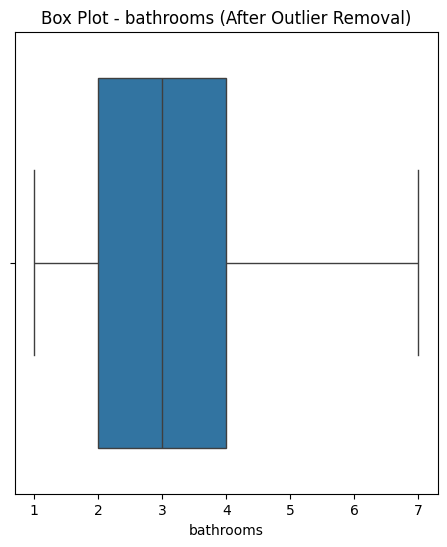

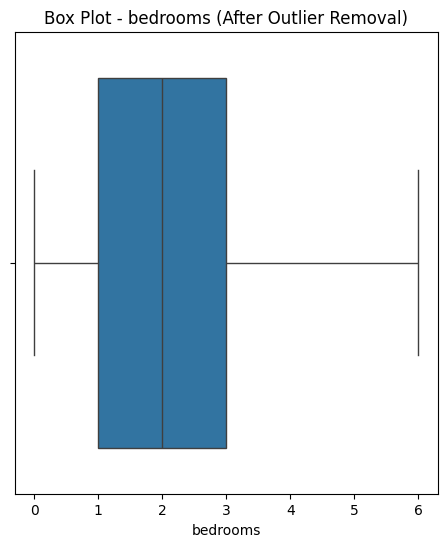

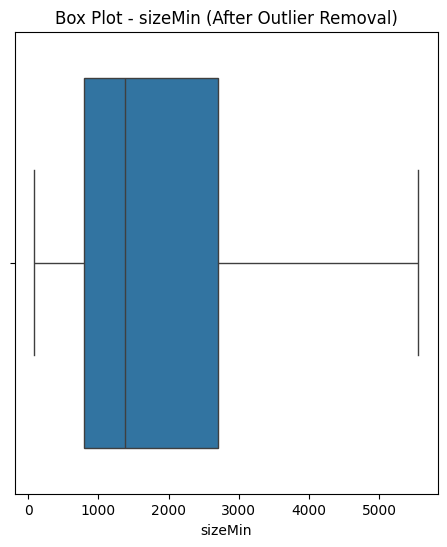

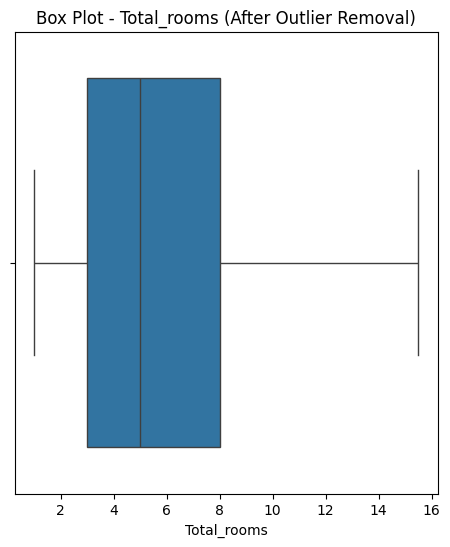

In [45]:
for col in columns_to_check:
    plt.figure(figsize=(12, 6))

    # Box plot after outlier removal
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box Plot - {col} (After Outlier Removal)')

    plt.show()

In [46]:
# df.to_csv('cleaned_real_estate_data.csv', index=False)

In [47]:
df["Has sea view"]= df["description"].str.contains("sea")

In [48]:
df["Average price of location"] = df["location"].map(df.groupby("location")["price"].mean())

In [49]:
df=df.drop(["title","displayAddress","addedOn","description","type","priceDuration","price_per_sqft"],axis=1)

In [50]:
from sklearn.compose import ColumnTransformer

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X=df.drop("price",axis=1)
y=df["price"]

In [53]:
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.2)

In [54]:
df["furnishing"].unique()

array(['NO', 'YES', 'PARTLY'], dtype=object)

In [55]:
ordinal_cols=["furnishing"]
ordinal_categories=[["NO","PARTLY","YES"]]

In [56]:
cols=df.columns.to_list()

In [57]:
onehot_cols=[]
numeric_cols=[]
for col in df.columns:
    if df[col].dtype=='O':
        onehot_cols.append(col)
    else:
        numeric_cols.append(col)
        
    

In [58]:
onehot_cols

['furnishing', 'Emirate', 'location']

In [59]:
onehot_cols.remove("furnishing")

In [60]:
onehot_cols

['Emirate', 'location']

In [61]:
numeric_cols.remove("price")

In [62]:
# numeric_cols.remove("price_per_sqft")

In [63]:
numeric_cols

['bathrooms',
 'bedrooms',
 'verified',
 'sizeMin',
 'has_plus_bedroom',
 'has_plus_bathroom',
 'Total_rooms',
 'Has sea view',
 'Average price of location']

In [64]:
df.columns

Index(['bathrooms', 'bedrooms', 'price', 'verified', 'sizeMin', 'furnishing',
       'Emirate', 'location', 'has_plus_bedroom', 'has_plus_bathroom',
       'Total_rooms', 'Has sea view', 'Average price of location'],
      dtype='object')

In [65]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler,OrdinalEncoder

In [66]:
preprocessor = ColumnTransformer(transformers=[
    ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ("ohe", OneHotEncoder(handle_unknown="ignore"), onehot_cols),
    ("num", StandardScaler(), numeric_cols)
])

In [67]:
preprocessor.fit(X_train)

,transformers,"[('ord', ...), ('ohe', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,"[['NO', 'PARTLY', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [68]:
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
from sklearn.metrics import r2_score
y_pred = lr.predict(X_test_transformed)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.437512550571607


In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train_transformed,y_train,cv=5).mean()

0.493572686571308

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [74]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_transformed, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
y_pred_rf = rf_model.predict(X_test_transformed)
r2 = r2_score(y_test, y_pred_rf)
print("R² Score:", r2)

R² Score: 0.49143439706228054


In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
avg_score=cross_val_score(rf_model,X_train_transformed,y_train,cv=5)

In [78]:
avg_score.mean()

0.7011757141943288

In [99]:
avg_score

array([0.6654946 , 0.7333638 , 0.70606185, 0.64391042, 0.75704789])

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_transformed, y_train)
y_pred_gb = gb_model.predict(X_test_transformed)


In [80]:
r2 = r2_score(y_test, y_pred_gb)
print("R² Score:", r2)

R² Score: 0.5085537758110581


In [81]:
cross_val_score(gb_model,X_train_transformed,y_train,cv=5).mean()

0.7175500229598845

In [82]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_transformed, y_train)
y_pred_xgb = xgb_model.predict(X_test_transformed)


In [83]:
cross_val_score(xgb_model,X_train_transformed,y_train,cv=5).mean()

0.7184819340705871

In [84]:
r2 = r2_score(y_test, y_pred_xgb)
print("R² Score:", r2)

R² Score: 0.4373079538345337


In [85]:
importances = rf_model.feature_importances_


In [86]:
from sklearn.compose import ColumnTransformer

def get_feature_names(preprocessor):
    feature_names = []

    for name, transformer, cols in preprocessor.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            names = transformer.get_feature_names_out(cols)
        else:
            names = cols
        feature_names.extend(names)
    
    return feature_names

feature_names = get_feature_names(preprocessor)


In [87]:
import pandas as pd

feat_imp_df = pd.DataFrame({
    "Feature": feature_names[:len(importances)],
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


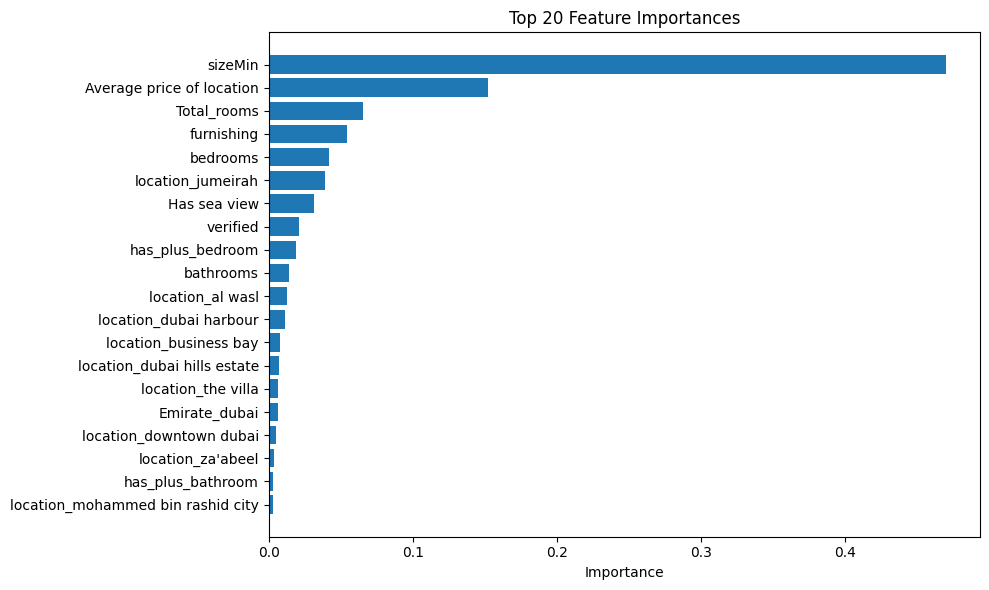

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"][:20], feat_imp_df["Importance"][:20])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [89]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RMSE:", rmse)


RMSE: 9646234.042489853


<Axes: ylabel='sizeMin'>

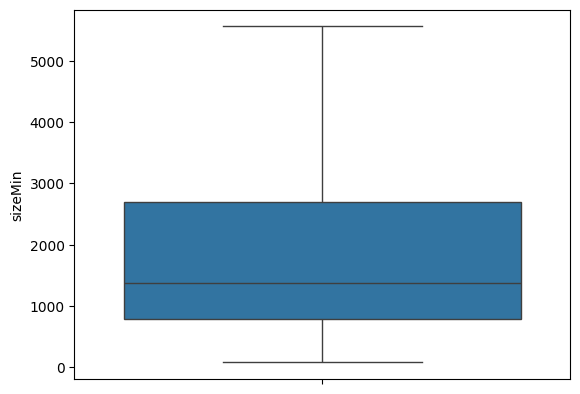

In [90]:
sns.boxplot(df["sizeMin"])

In [91]:
df.describe()

,bathrooms,bedrooms,price,sizeMin,Total_rooms,Average price of location
count,4696.000000,4696.000000,4.696000e+03,4696.000000,4696.000000,4.696000e+03
mean,3.086031,2.304302,4.958806e+06,1992.618851,5.419506,4.958806e+06
std,1.765800,1.575515,9.893779e+06,1599.187934,3.356366,3.958587e+06
min,1.000000,0.000000,1.000000e+05,82.000000,1.000000,1.700000e+05
25%,2.000000,1.000000,1.175000e+06,792.750000,3.000000,2.353664e+06
50%,3.000000,2.000000,2.327500e+06,1376.500000,5.000000,3.357624e+06
75%,4.000000,3.000000,4.412916e+06,2700.000000,8.000000,7.038596e+06
max,7.000000,6.000000,1.990000e+08,5560.875000,15.500000,4.774975e+07


<Axes: xlabel='price', ylabel='Count'>

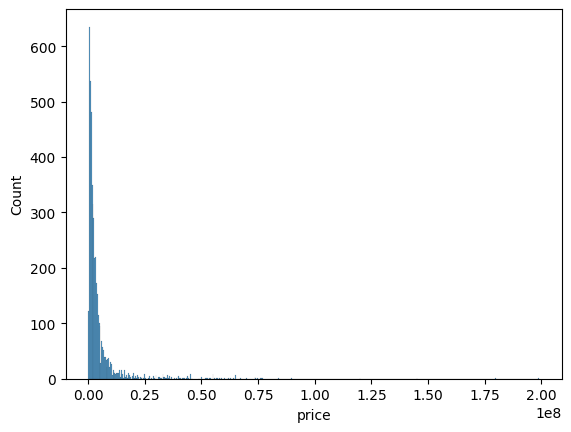

In [92]:
sns.histplot(df["price"])

In [93]:
df["log_price"] = np.log(df["price"])

<Axes: xlabel='log_price', ylabel='Count'>

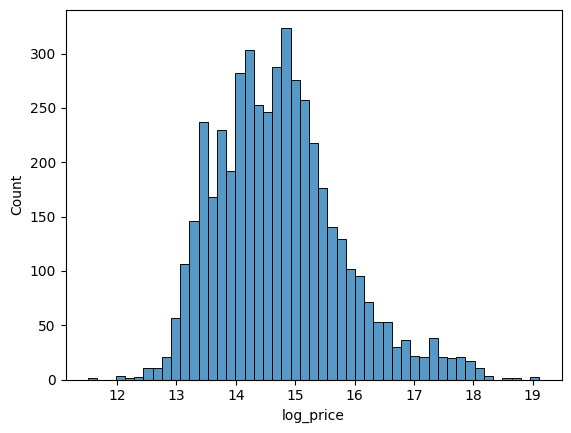

In [94]:
sns.histplot(df["log_price"])

In [109]:
from sklearn.pipeline import Pipeline
import pickle as pkl

In [107]:
pipeline=Pipeline([("preprocessing",preprocessor),
                   ("regressor",rf_model)])

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('ohe', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [110]:
with open("real_estate_price_prediction_1.pkl","wb") as file:
    pkl.dump(pipeline,file)

In [ ]:
df["location"].unique()

In [ ]:
df.info()

In [ ]:
print(len(feature_names), len(importances))


In [ ]:
print(feature_names[-1])  # Peek at the last one


In [100]:
df["price"].mean()

4958805.705068143

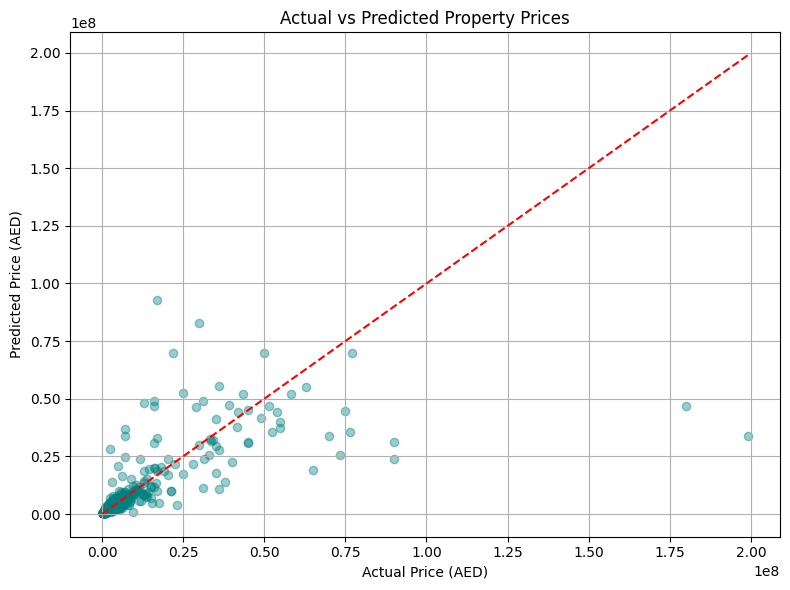

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Price (AED)')
plt.ylabel('Predicted Price (AED)')
plt.title('Actual vs Predicted Property Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


In [102]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Assume y_test and y_pred_rf are your actual and predicted values
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
df_eval['Price Band'] = pd.cut(df_eval['Actual'], bins=[0, 2000000, 10000000, np.inf],
                               labels=['<2M', '2M–10M', '>10M'])

# Compute RMSE per band
for band in df_eval['Price Band'].unique():
    segment = df_eval[df_eval['Price Band'] == band]
    rmse_band = np.sqrt(mean_squared_error(segment['Actual'], segment['Predicted']))
    print(f"RMSE for {band} listings: AED {rmse_band:,.0f}")


RMSE for 2M–10M listings: AED 2,922,905
RMSE for <2M listings: AED 350,764
RMSE for >10M listings: AED 29,367,591


In [103]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_rf)
print(f"MAE: AED {mae:,.0f}")

MAE: AED 2,242,934


In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error

# Wrap MAE in a scorer function
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Run cross-validation
mae_scores = cross_val_score(rf_model,X_train_transformed,y_train,cv=5)

# Convert negative scores to positive for readability
mae_scores_abs = -mae_scores

# Print results
print(f"Cross-Validated MAE (per fold): {mae_scores_abs}")
print(f"Average MAE: AED {mae_scores_abs.mean():,.0f}")


Cross-Validated MAE (per fold): [-0.6654946  -0.7333638  -0.70606185 -0.64391042 -0.75704789]
Average MAE: AED -1


In [105]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# Build evaluation DataFrame
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
df_eval['Price Band'] = pd.cut(df_eval['Actual'], bins=[0, 2_000_000, 10_000_000, np.inf],
                               labels=['<2M', '2M–10M', '>10M'])

# MAE per price band
for band in df_eval['Price Band'].unique():
    segment = df_eval[df_eval['Price Band'] == band]
    mae_band = mean_absolute_error(segment['Actual'], segment['Predicted'])
    print(f"MAE for {band} listings: AED {mae_band:,.0f}")


MAE for 2M–10M listings: AED 1,130,129
MAE for <2M listings: AED 208,127
MAE for >10M listings: AED 15,744,601


In [111]:
average_price_lookup = df.groupby('location')['price'].mean().to_dict()

In [112]:
average_price_lookup

{'ajman downtown': 1082552.142857143,
 'al alia': 2034142.857142857,
 'al ameera village': 325500.0,
 'al amerah': 1295781.1785714286,
 'al bahia': 1480000.0,
 'al barari': 16644117.647058824,
 'al barsha': 4581396.642857143,
 'al bustan': 170000.0,
 'al dhahir': 3500000.0,
 'al dhait': 16337500.0,
 'al furjan': 3170697.9669421487,
 'al ghadeer': 1570000.0,
 'al hamra village': 1567049.96,
 'al hamriyah': 2474513.709677419,
 'al helio': 1800000.0,
 'al jaddaf': 2048125.0,
 'al jubail': 9554166.666666666,
 'al jurf': 6407997.125,
 'al khan': 1599669.6666666667,
 'al kifaf': 2683879.230769231,
 'al majaz 3': 1033333.3333333334,
 'al mamsha': 935940.5882352941,
 'al mamzar': 1157794.52,
 'al maqtaa': 5000000.0,
 'al marjan island': 2613836.462686567,
 'al maryah island': 892250.0,
 'al mowaihat': 2085555.5555555555,
 'al mushrif': 7750000.0,
 'al nahda': 450000.0,
 'al nakheel': 518333.22222222225,
 'al nuaimiya': 365000.0,
 'al quoz': 1170000.0,
 'al qurm': 21500000.0,
 'al qusaidat': 15